### Imports

In [1]:
import torch
import numpy as np
import sys 
sys.path.append('/home/21576262@su/masters/src')
from data.get_data import get_seg_dataloaders, get_her2status_dataloaders
from data.data_loading import CustomDataset, define_transforms, split_data
from data.get_data import split_tumour_data, HER2Dataset
import matplotlib.pyplot as plt
import os
import torch.utils.data as data_utils
import random
from torch.utils.data import Dataset
from torchvision import transforms
from PIL import Image
import torchvision.transforms.functional as TF
import pandas as pd

In [19]:
# Check total number of patches available
img_dir = '/home/21576262@su/masters/data/patches/'

folders = os.listdir(img_dir)
tt=0
for folder in folders:
    tt+=(len(os.listdir(img_dir + folder)))
print(tt)

364585


In [20]:
# using full set of data
img_dir = '/home/21576262@su/masters/data/patches/'
labels_dir = '/home/21576262@su/masters/data/labels/' 

SEED=42

split=[70, 15, 15] # for splitting into train/val/test

train_cases, val_cases, test_cases = split_tumour_data(img_dir, labels_dir, split, SEED)
# train_cases, val_cases, test_cases = split_data(img_dir, split, SEED)

Total tumour patches: 232506 
Number of training patches: 163471 
Number of validation patches 35335 
Number of test patches 33700


Note! this is counting all tumour patches, but some of these may have been removed by me when manually removing some tiles therefore this total may not be completely correct
-> this is actually okay because the split isn't exact anyway when taking into account the data leaking

In [21]:
train_img_folders = [img_dir + case for case in train_cases]
val_img_folders = [img_dir + case for case in val_cases]
test_img_folders = [img_dir + case for case in test_cases]

# Contains the file path for each .pt file for the cases used in each of the sets
train_labels = [labels_dir + case + '.pt' for case in train_cases]
val_labels = [labels_dir + case + '.pt' for case in val_cases]
test_labels = [labels_dir + case + '.pt' for case in test_cases]

In [22]:
print(len(train_img_folders), len(val_img_folders), len(test_img_folders))

97 29 21


In [23]:
data_transforms = define_transforms(256, isInception=True, isInceptionResnet=False)

In [24]:
image_datasets = {
    'train': CustomDataset(train_img_folders, train_labels, transform=data_transforms['train']),
    'val': CustomDataset(val_img_folders, val_labels, transform=data_transforms['val']),
    'test': CustomDataset(test_img_folders, test_labels, transform=data_transforms['test'])
}

In [25]:
print(len(image_datasets['train']))
print(len(image_datasets['val']))
print(len(image_datasets['test']))

251884
56484
56217


In [26]:
image_datasets = {
    'train': HER2Dataset(train_img_folders, train_labels, transform=data_transforms['train']),
    'val': HER2Dataset(val_img_folders, val_labels, transform=data_transforms['val']),
    'test': HER2Dataset(test_img_folders, test_labels, transform=data_transforms['test'])
}

In [27]:
print(len(image_datasets['train']))
print(len(image_datasets['val']))
print(len(image_datasets['test']))

163047
35180
33620


In [ ]:
num_0=0
num_1=0
for sample in image_datasets['train']:
    if sample[1]==0:
        num_0+=1
    elif sample[1]==1:
        num_1+=1
print(num_0)
print(num_1)

In [ ]:
# Create training, validation and test dataloaders
    dataloaders = {
        'train': data_utils.DataLoader(image_datasets['train'], batch_size=batch_size, num_workers=num_cpus, shuffle=True, drop_last=True),
        'val': data_utils.DataLoader(image_datasets['val'], batch_size=batch_size, num_workers=num_cpus, shuffle=True),
        'test': data_utils.DataLoader(image_datasets['test'], batch_size=batch_size, num_workers=num_cpus, shuffle=True)
    }

In [16]:
batch_size=32
SEED=42
Inception=False # set for visualisation purposes
InceptionResnet=False

In [17]:
dataloaders = get_her2status_dataloaders(batch_size, SEED, Inception=Inception, InceptionResnet=InceptionResnet)

Total tumour patches: 232506 
Number of training patches: 163471 
Number of validation patches 35335 
Number of test patches 33700


In [18]:
print(dataloaders)

{'train': <torch.utils.data.dataloader.DataLoader object at 0x7fe543f080d0>, 'val': <torch.utils.data.dataloader.DataLoader object at 0x7fe543f08070>, 'test': <torch.utils.data.dataloader.DataLoader object at 0x7fe543f081c0>}


In [19]:
print(f"Total tumour patches: {len(dataloaders['train'])*batch_size + len(dataloaders['val'])*batch_size + len(dataloaders['test'])*batch_size} \nNumber of training patches: {len(dataloaders['train'])*batch_size} \nNumber of validation patches {len(dataloaders['val'])*batch_size} \nNumber of test patches {len(dataloaders['test'])*batch_size}")

Total tumour patches: 231872 
Number of training patches: 163040 
Number of validation patches 35200 
Number of test patches 33632


In [20]:
first_batch = next(iter(dataloaders['train']))

imgs = first_batch[0]
labels = first_batch[1]

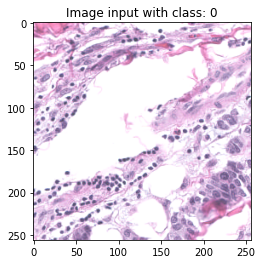

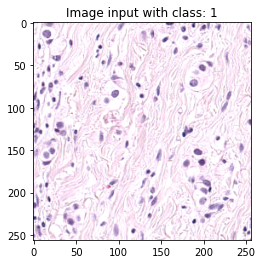

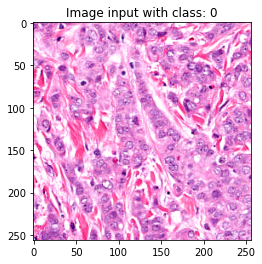

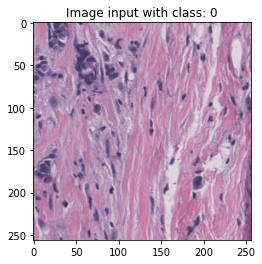

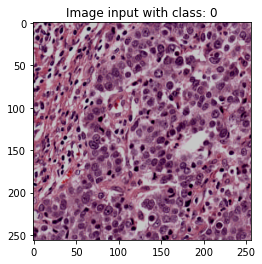

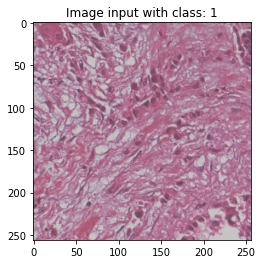

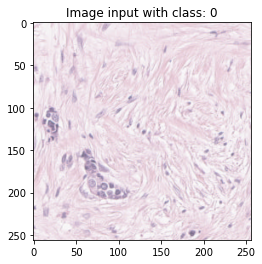

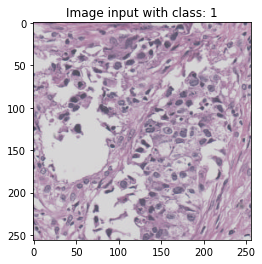

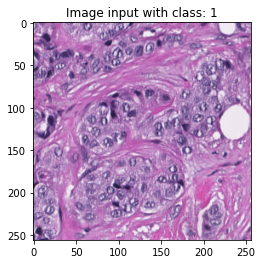

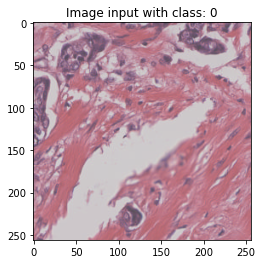

In [21]:
max_idx = 10
for i in range(len(labels)):
    if i < max_idx:
        img = np.transpose(imgs[i, :, :, :].numpy(), (1, 2, 0))
        lbl = labels[i]
        plt.imshow(img)
        plt.title(f"Image input with class: {lbl}")
        plt.show()

In [2]:
# Number of classes in the dataset
num_classes = 2
# Batch size for training
batch_size = 32
# Number of epochs to train for
num_epochs = 25

model_name = 'inceptionresnet'

InceptionResnet = True if model_name == 'inceptionresnet' else False
Inception = True if model_name == 'inception' else False

print(f"Model name: {model_name}")

SEED=42

# train_cases, val_cases, test_cases, dataloaders = get_seg_dataloaders(batch_size, SEED, Inception=Inception, InceptionResnet=InceptionResnet)
train_cases, val_cases, test_cases, dataloaders = get_her2status_dataloaders(batch_size, SEED, Inception=Inception, InceptionResnet=InceptionResnet)

Model name: inceptionresnet
Total tumour patches: 231872 
Number of training patches: 163040 
Number of validation patches 35200 
Number of test patches 33632


In [3]:
first_batch = next(iter(dataloaders['train']))

imgs = first_batch[0]
labels = first_batch[1]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


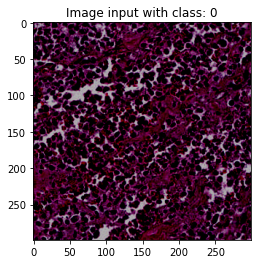

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


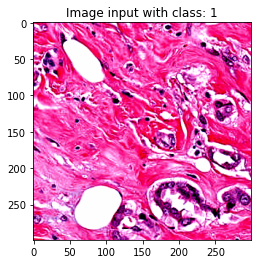

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


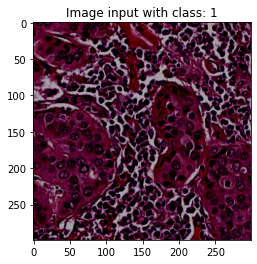

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


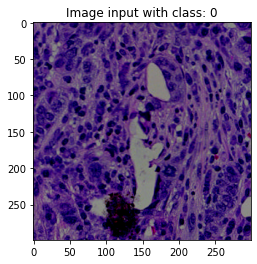

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


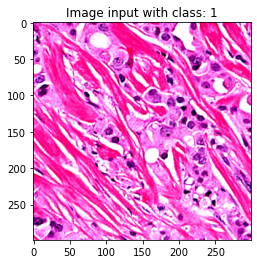

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


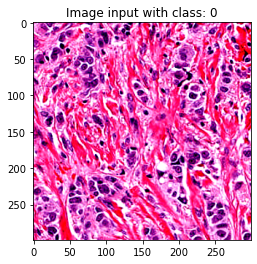

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


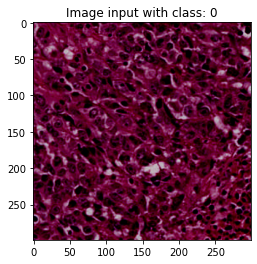

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


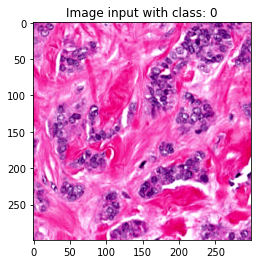

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


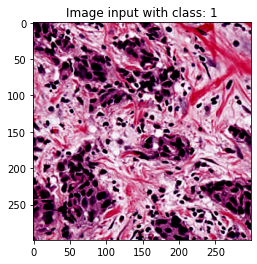

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


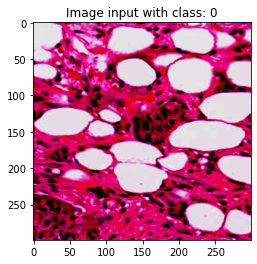

In [4]:
max_idx = 10
for i in range(len(labels)):
    if i < max_idx:
        img = np.transpose(imgs[i, :, :, :].numpy(), (1, 2, 0))
        lbl = labels[i]
        plt.imshow(img)
        plt.title(f"Image input with class: {lbl}")
        plt.show()